##  Week2 복습과제
### 1. Wine 성분 데이터를 바탕으로 와인 품질 분류
### 결정트리, 랜덤포레스트 실습
#### 데이터셋을 다운 받아주세요!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 'train.csv'를 불러와 train_df에, 'test.csv'를 불러와 test_df에 저장하시오

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

#### 1.2 train 데이터의 3 행을 통해 데이터를 파악하시오

In [3]:
train_df.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


#### 1.3 index 열이 불필요해보입니다. drop을 통해 train과 test 데이터의 index행을 삭제하세요 그리고 확인해주세요

In [4]:
train_df.drop('index', axis=1, inplace=True)
test_df.drop('index', axis=1, inplace=True)

print(train_df.columns)
print(test_df.columns)

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')


#### 1.4 train 데이터의 결측치의 유무 여부 또는 평균, min, max, q1, q2, q3, q4 등을 describe 또는 info를 활용해 확인하시오

In [5]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB
None
           quality  fixed acidity  volatile acidity  citri

#### 1.5 'quality'열에 어떤 값이 들어있는 지 알아보시오 (예측하고자 하는 y값이 될 열 입니다.) value_counts 사용

In [6]:
train_df['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

#### 1.6 train 데이터와 test 데이터의 'type'이 object로 되어있으니 인코딩을 해주세요 (레이블인코딩, encoder.fit_transform 사용)
#### 잘 인코딩이 되었는지 확인해주세요(value_counts() 사용)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df['type'] = encoder.fit_transform(train_df['type'])
test_df['type'] = encoder.fit_transform(test_df['type'])

In [8]:
print(train_df['type'].value_counts())
print(test_df['type'].value_counts())

1    4159
0    1338
Name: type, dtype: int64
1    739
0    261
Name: type, dtype: int64


#### 1.7 독립변수(X)와 종속변수(y)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [9]:
from sklearn.model_selection import train_test_split
x_train_df = train_df.iloc[:,1:]
y_train_df = train_df.iloc[:,0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size = 0.2, random_state=12)

#### 1.8 DecisionTreeClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오. 
#### DecisionTreeClassifer 의 random_state = 12

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
dt_clf = DecisionTreeClassifier(random_state=12)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.6082


#### 1.9 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으시오

params = {
    'max_depth' : [11, 14, 17, 20, 23, 26, 29],
    'min_samples_split' : [2]
}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = {'max_depth': [11,14,17,20,23,26,29], 'min_samples_split':[2]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.5727
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 17, 'min_samples_split': 2}


#### 1.10 테스트 데이터 세트에 대해 예측을 수행해주세요

In [15]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('best_estimator_ 예측 정확도: {0:.4f}'.format(accuracy))

best_estimator_ 예측 정확도: 0.5973


### 2. 앙상블, 랜덤 포레스트

#### 2.1 개별 모델로 로지스틱 회귀와 KNN을 사용하여 개별 모델의 학습 / 예측/ 평가를 진행해보세요. (solver="liblinear", n_neighbors = 16)

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
lr_clf = LogisticRegression(solver="liblinear")
knn_clf = KNeighborsClassifier(n_neighbors=16)

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.5464
KNeighborsClassifier 정확도: 0.4573


#### 2.2 로지스틱 회귀와 KNN을 기반으로 하여 보팅 분류기를 만들어 본 후, 학습/예측/평가를 진행해보세요. (VotingClassifier 사용, voting='soft')

In [18]:
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)], voting='soft')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('보팅 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

보팅 분류기 정확도: 0.5173


#### 2.3 randomforestclassifier를 이용하여 훈련 데이터를 fit한 후, 테스트셋의 정확도를 구하세요(random_state=12, max_depth=8)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [20]:
rf_clf = RandomForestClassifier(random_state=12, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

랜덤 포레스트 정확도: 0.6109


#### 2.4 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.(random_state=12, n_jobs= -1, cv=2)

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 
    'min_samples_split' : [8, 16, 24, 32]
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = { 
    'n_estimators':[10, 50, 100], 
    'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 
    'min_samples_split' : [8, 16, 24, 32] 
}

rf_clf = RandomForestClassifier(random_state=12, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 14, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}
최고 예측 정확도: 0.5790


#### 2.5 2.4번에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 성능을 측정해보세요.

In [23]:
rf_clf1 = RandomForestClassifier(max_depth=14, min_samples_leaf=8, min_samples_split=8, n_estimators=50)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.6064


#### 2.6 피처 주요도를 막대그래프로 시각화해보세요.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

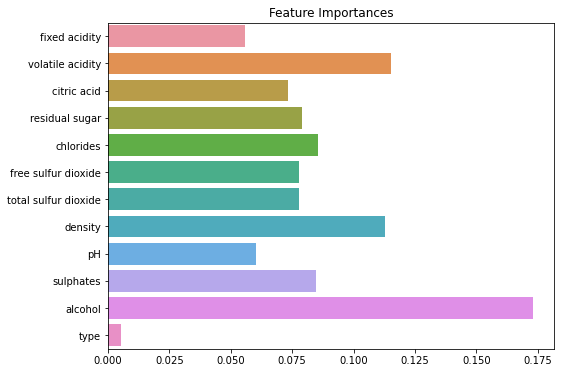

In [25]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)
plt.show()

### 3. SVM 사용

#### 3.1 split된 와인 분류 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요. (C = 5)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [27]:
lin_svm = SVC(kernel='linear', C=5)
lin_svm.fit(X_train, y_train)
pred = lin_svm.predict(X_test)
print('선형 SVM 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

선형 SVM 예측 정확도: 0.5482


#### 3.2 와인 품질 분류 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [ ]:
GS = GridSearchCV(lin_svm, param_grid=param, cv=5)
GS.fit(X_train, y_train)
print('GS 최적 하이퍼 파라미터: \n', GS.best_params_)
print('GS 최고 예측 정확도: {0:.4f}'.format(GS.best_score_))

#### 3.3 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.(best_estimator_ 이용)

In [ ]:
estimator = GS.best_estimator_
pred = estimator.predict(X_test)
print('최적 파라미터 이용한 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#### 3.4 GridSearchCV를 이용하여 최적의 gamma, C 값을 찾고 가우시안 SVM 모델을 만들어 fit 하세요.

In [ ]:
params={'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [ ]:
GS = GridSEarchCV(SVC(kernel='rbf'), param_grid=params, cv=5)
GS.fit(X_train, y_train)

print('GS 최적 하이퍼 파라미터: \n', GS.best_params_)